In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from utils import edhrec_requests as edh
from utils import funciones
from utils import api_requests as req

In [13]:
#Primera parte. Una vez tenemos el Data Frame de las Cartas, vamos a mirarlo y luego a limpiarlo
#Lo cargamos desde el fichero
df = pd.read_csv("../data/scryfall_cards.csv")
#Lo miramos para ver que está bonito
df.info()

C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\3727961735.py:3: DtypeWarning: Columns (74,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/scryfall_cards.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105911 entries, 0 to 105910
Data columns (total 87 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   object               105911 non-null  object 
 1   id                   105911 non-null  object 
 2   oracle_id            105837 non-null  object 
 3   multiverse_ids       105911 non-null  object 
 4   mtgo_id              54222 non-null   float64
 5   arena_id             16139 non-null   float64
 6   tcgplayer_id         90762 non-null   float64
 7   name                 105911 non-null  object 
 8   lang                 105911 non-null  object 
 9   released_at          105911 non-null  object 
 10  uri                  105911 non-null  object 
 11  scryfall_uri         105911 non-null  object 
 12  layout               105911 non-null  object 
 13  highres_image        105911 non-null  bool   
 14  image_status         105911 non-null  object 
 15  image_uris       

In [14]:
#Ahora vamos a quedarnos sólo con las que son legales en Commander. 
# La columna de "legalities" contiene un diccionario en forma de string en la celda.
#Lo que me interesa es que sea "'commander': 'legal'". Con las comillas simples.
df_commander = df[df['legalities'].str.contains("'commander': 'legal'", case=False, na=False)]
df_commander.info()
df_commander.head()

<class 'pandas.core.frame.DataFrame'>
Index: 96387 entries, 0 to 105910
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   object               96387 non-null  object 
 1   id                   96387 non-null  object 
 2   oracle_id            96319 non-null  object 
 3   multiverse_ids       96387 non-null  object 
 4   mtgo_id              53843 non-null  float64
 5   arena_id             15385 non-null  float64
 6   tcgplayer_id         86941 non-null  float64
 7   name                 96387 non-null  object 
 8   lang                 96387 non-null  object 
 9   released_at          96387 non-null  object 
 10  uri                  96387 non-null  object 
 11  scryfall_uri         96387 non-null  object 
 12  layout               96387 non-null  object 
 13  highres_image        96387 non-null  bool   
 14  image_status         96387 non-null  object 
 15  image_uris           95132 non-null  obj

,object,id,oracle_id,multiverse_ids,mtgo_id,arena_id,tcgplayer_id,name,lang,released_at,...,flavor_name,attraction_lights,color_indicator,printed_type_line,printed_text,variation_of,life_modifier,hand_modifier,content_warning,defense
0,card,0000419b-0bba-4488-8f7a-6194544ce91e,b34bb2dc-c1af-4d77-b0b3-a0fb342a5fc6,[668564],129825.0,91829.0,558404.0,Forest,en,2024-08-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,NaN,14240.0,Fury Sliver,en,2006-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,NaN,33347.0,Kor Outfitter,en,2009-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,66119.0,145764.0,Siren Lookout,en,2017-09-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,Web,en,1994-04-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Ahora vamos a ir eliminando los tipos de carta o las cartas que no son relevantes para el análisis
#Aquí vamos a quitar las cartas de tipo "Basic Land", "Atracciones", "Tokens" y demás.
mask = df_commander[df_commander["type_line"].str.contains("Basic Land", na=False)]
maskSnow = df_commander[df_commander["type_line"].str.contains("Basic Snow Land", na=False)]
df_commander.drop(maskSnow.index, inplace=True)
df_commander.drop(mask.index, inplace=True)
df_commander.info()

C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\1019260199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commander.drop(maskSnow.index, inplace=True)
C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\1019260199.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commander.drop(mask.index, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 91960 entries, 1 to 105910
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   object               91960 non-null  object 
 1   id                   91960 non-null  object 
 2   oracle_id            91892 non-null  object 
 3   multiverse_ids       91960 non-null  object 
 4   mtgo_id              51626 non-null  float64
 5   arena_id             14567 non-null  float64
 6   tcgplayer_id         83074 non-null  float64
 7   name                 91960 non-null  object 
 8   lang                 91960 non-null  object 
 9   released_at          91960 non-null  object 
 10  uri                  91960 non-null  object 
 11  scryfall_uri         91960 non-null  object 
 12  layout               91960 non-null  object 
 13  highres_image        91960 non-null  bool   
 14  image_status         91960 non-null  object 
 15  image_uris           90705 non-null  obj

C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\3535369642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commander['released_at'] = pd.to_datetime(df_commander['released_at'], errors='coerce')
C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\3535369642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commander['year'] = df_commander['released_at'].dt.year


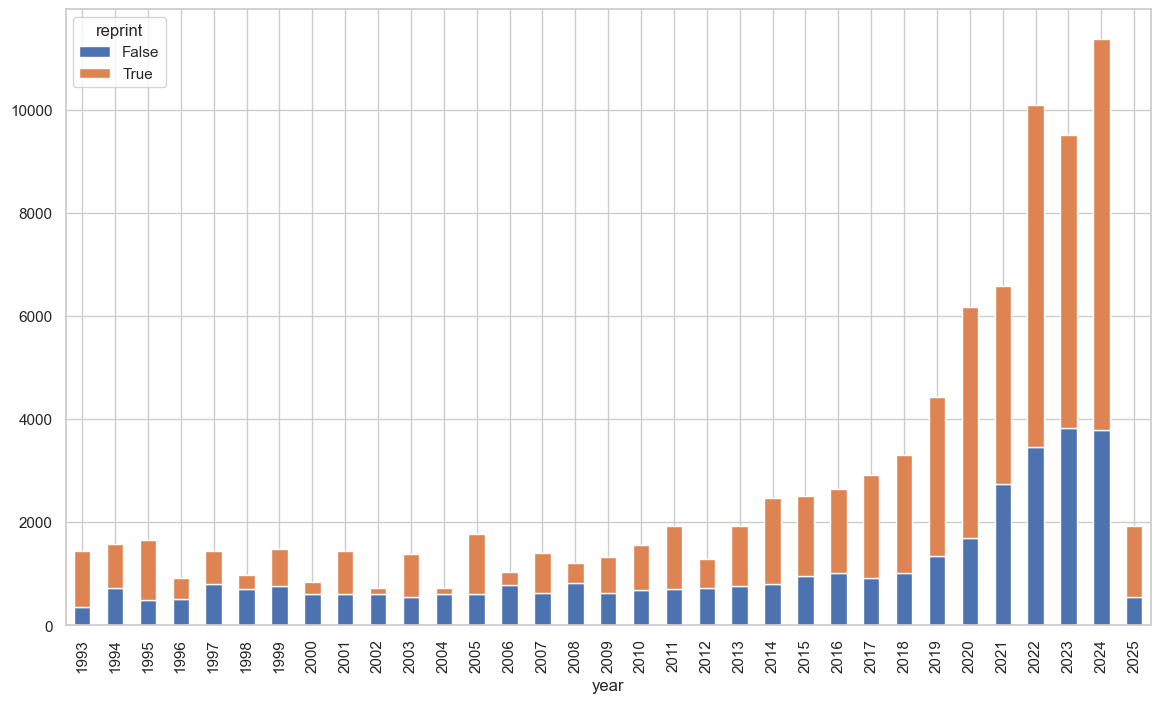

In [ ]:
df_commander["released_at"] = pd.to_datetime(df_commander["released_at"], errors='coerce')
df_commander["year"] = df_commander["released_at"].dt.year

# Filtrar las cartas que están disponibles en el DataFrame
df_filtered = df_commander[["year", "reprint"]].dropna(subset=["year", "reprint"])

# Contar las cartas nuevas y reimpresas por año
df_count = df_filtered.groupby(["year", "reprint"]).size().unstack(fill_value=0)

# Crear la gráfica
sns.set(style="whitegrid")
ax = df_count.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.show()



In [17]:
# Cálculo del porcentaje de cartas nuevas respecto a las reimpresiones
new_cards = df_count[False].sum()
reprint_cards = df_count[True].sum()
percentage_new = (new_cards / (new_cards + reprint_cards)) * 100
print(f"Cartas nuevas: {new_cards} \nCartas Reimpresas: {reprint_cards}")
print(f'Porcentaje de cartas nuevas respecto a las reimpresiones: {percentage_new:.2f}%')

Cartas nuevas: 35706 
Cartas Reimpresas: 56254
Porcentaje de cartas nuevas respecto a las reimpresiones: 38.83%


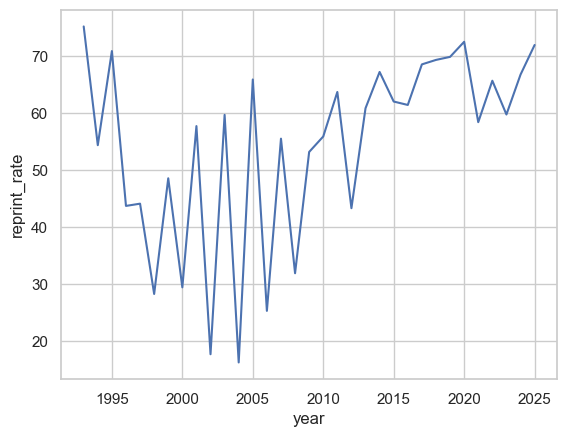

In [ ]:
# Contar las cartas nuevas y reimpresas por año
df_count = df_filtered.groupby(['year', 'reprint']).size().unstack(fill_value=0)
df_count['reprint_rate'] = (df_count[True] / (df_count[True] + df_count[False])) * 100

sns.lineplot(x=df_count.index, y=df_count['reprint_rate'])
plt.show()

C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\2473282476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commander["released_at"] = pd.to_datetime(df_commander["released_at"], errors="coerce")
C:\Users\Edurne\AppData\Local\Temp\ipykernel_9556\2473282476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commander["year"] = df_commander["released_at"].dt.year


year
1993    75.226797
1994    54.371410
1995    70.901391
1996    43.702081
1997    44.097222
1998    28.234086
1999    48.554136
2000    29.397875
2001    57.724138
2002    17.647059
2003    59.694989
2004    16.204986
2005    65.911665
2006    25.266215
2007    55.516014
2008    31.874484
2009    53.181818
2010    55.897436
2011    63.716356
2012    43.302181
2013    60.862786
2014    67.235079
2015    62.035928
2016    61.436673
2017    68.563593
2018    69.347496
2019    69.882777
2020    72.534413
2021    58.414338
2022    65.692201
2023    59.760202
2024    66.763310
2025    71.968912
Name: reprint_rate, dtype: float64


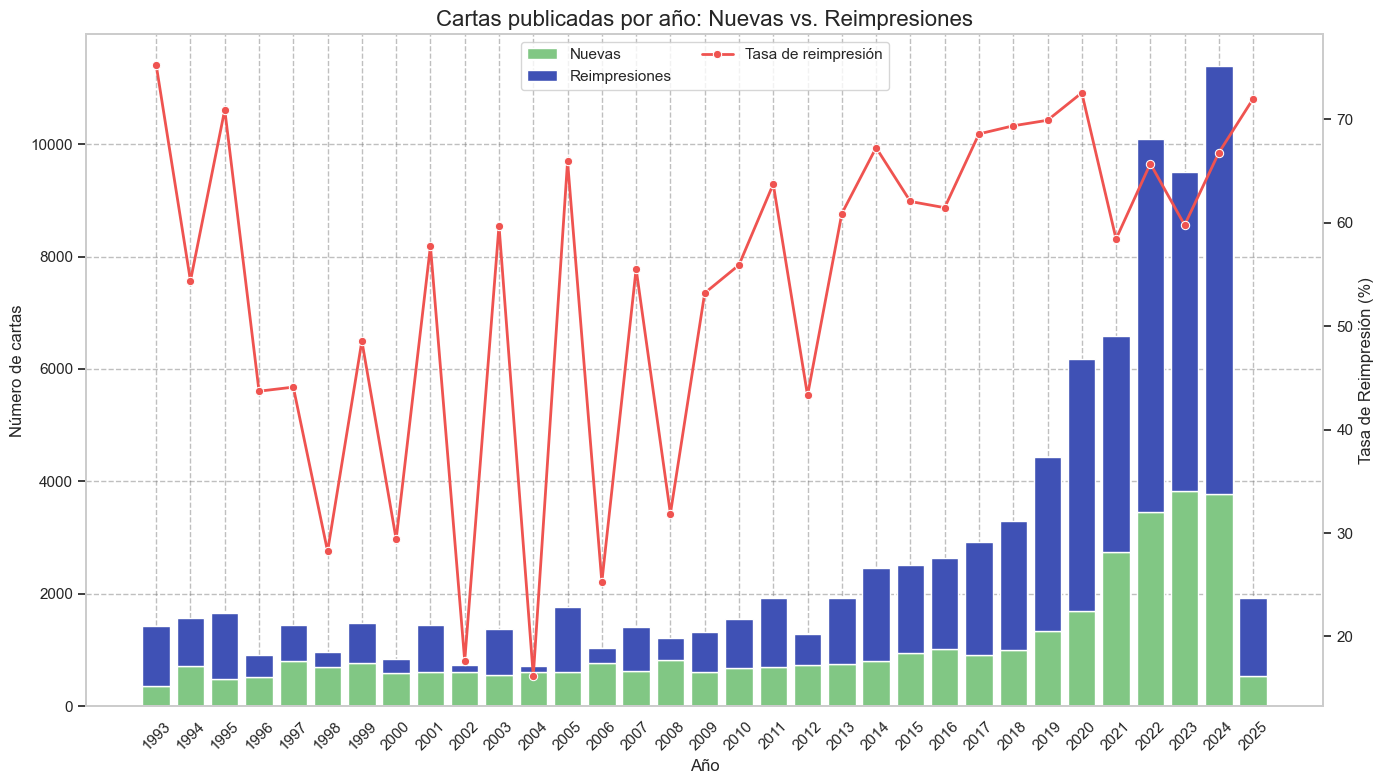

In [ ]:
df_commander["released_at"] = pd.to_datetime(df_commander["released_at"], errors="coerce")
df_commander["year"] = df_commander["released_at"].dt.year

# Filtrar las cartas que están disponibles en el DataFrame
df_filtered = df_commander[["year", "reprint"]].dropna(subset=["year", "reprint"])

# Contar las cartas nuevas y reimpresas por año
df_count = df_filtered.groupby(["year", "reprint"]).size().unstack(fill_value=0)

# Asegurarse de que todos los años estén presentes
df_count = df_count.reindex(range(df_count.index.min(), df_count.index.max() + 1), fill_value=0)

# Calcular la tasa de reimpresión por año
df_count["reprint_rate"] = (df_count[True] / (df_count[True] + df_count[False])) * 100
print(df_count["reprint_rate"]) #Por comprobaciones de luego

# Crear la figura y el eje principal
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de barras apiladas
bars1 = ax.bar(df_count.index, df_count[False], color="#81c784", label="Nuevas")  # Barras para cartas nuevas
bars2 = ax.bar(df_count.index, df_count[True], bottom=df_count[False], color="#3f51b5", label="Reimpresiones")  # Barras para reimpresiones

ax.set_title("Cartas publicadas por año: Nuevas vs. Reimpresiones", fontsize=16)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Número de cartas", fontsize=12)
ax.set_xticks(df_count.index)  
ax.set_xticklabels(df_count.index, rotation=45) 

#Lineplot
ax2 = ax.twinx()
ax2.grid(False) 
ax.grid(True, linestyle="--", color="gray", alpha=0.5) 
sns.lineplot(x=df_count.index, y=df_count["reprint_rate"], ax=ax2, color="#ef5350", marker="o", label="Tasa de reimpresión", linewidth=2)
ax2.set_ylabel("Tasa de Reimpresión (%)", fontsize=12)

# Combinar leyendas
handles, labels = ax.get_legend_handles_labels() 
handles2, labels2 = ax2.get_legend_handles_labels() 
ax2.legend(handles + handles2, labels + labels2, loc="upper center", bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.show();

In [ ]:
#Cálculos varios

nuevas_2024 = df_count.loc[2024, False]
reimpresiones_2024 = df_count.loc[2024, True]

# Totales generales
total_nuevas = df_count[False].sum()
total_reimpresiones = df_count[True].sum()

# Cálculo de porcentajes
porcentaje_nuevas_2024 = (nuevas_2024 / total_nuevas) * 100
porcentaje_reimpresiones_2024 = (reimpresiones_2024 / total_reimpresiones) * 100

# Mostrar resultados
print(f"Porcentaje de cartas nuevas en 2024 respecto al total: {porcentaje_nuevas_2024:.2f}%")
print(f"Porcentaje de reimpresiones en 2024 respecto al total: {porcentaje_reimpresiones_2024:.2f}%")

Porcentaje de cartas nuevas en 2024 respecto al total: 10.59%
Porcentaje de reimpresiones en 2024 respecto al total: 13.51%


In [30]:
df_recent = df_count.loc[2019:2024]
print(df_recent)

nuevas_fil = df_recent[False].sum()  
reimpresiones_fil = df_recent[True].sum() 

#Calcular los porcentajes respecto al total histórico
porcentaje_nuevas = (nuevas_fil / total_nuevas) * 100
porcentaje_reimpresiones = (reimpresiones_fil / total_reimpresiones) * 100

print(df_count.loc[2019:2024]["reprint_rate"].mean())

# Mostrar resultados
print(f"Porcentaje de cartas nuevas entre 2021 y 2024 respecto al total: {porcentaje_nuevas:.2f}%")
print(f"Porcentaje de reimpresiones entre 2021 y 2024 respecto al total: {porcentaje_reimpresiones:.2f}%")

reprint  False  True  reprint_rate
year                              
2019      1336  3100     69.882777
2020      1696  4479     72.534413
2021      2738  3846     58.414338
2022      3462  6629     65.692201
2023      3826  5682     59.760202
2024      3783  7599     66.763310
65.50787356958209
Porcentaje de cartas nuevas entre 2021 y 2024 respecto al total: 47.17%
Porcentaje de reimpresiones entre 2021 y 2024 respecto al total: 55.70%
